##**Implementation 1:** Convex Hull.

### 1. Implement the following algorithms for finding the convex hull in the plane:

\\
- Incremental Algorithm



- Gift Wrapping Algorithm

\\
- Divide and Conquer Algorithm

\\
- QuickHull Algorithm.


\\

###**Answer**

- Incremental Algorithm

In [ ]:
import random
import matplotlib.pyplot as plt

def orientation(p1, p2, p3):
    # Calculates the orientation of three points
    # Returns 0 if they are collinear, 1 if clockwise, and 2 if counterclockwise
    val = (p2[1] - p1[1]) * (p3[0] - p2[0]) - (p2[0] - p1[0]) * (p3[1] - p2[1])
    if val == 0:
        return 0  # Collinear
    elif val > 0:
        return 1  # Clockwise
    else:
        return 2  # Counterclockwise


def incremental(points):
    # Sort the points in lexicographic order
    sorted_points = sorted(points)

    upper_hull = []
    lower_hull = []

    # Build the upper hull
    for point in sorted_points:
        while len(upper_hull) >= 2 and orientation(upper_hull[-2], upper_hull[-1], point) != 2:
            upper_hull.pop()
        upper_hull.append(point)

    # Build the lower hull
    for point in reversed(sorted_points):
        while len(lower_hull) >= 2 and orientation(lower_hull[-2], lower_hull[-1], point) != 2:
            lower_hull.pop()
        lower_hull.append(point)

    # Remove the duplicate points at the endpoints
    lower_hull = lower_hull[1:-1]

    # Concatenate the upper and lower hulls
    convex_hull = upper_hull + lower_hull

    return convex_hull




- Gift Wrapping Algorithm

In [ ]:
import random
import matplotlib.pyplot as plt

import math

def orientation(p, q, r):
    # Returns the orientation of triplet (p, q, r)
    # Possible return values:
    # 0: Collinear
    # 1: Clockwise
    # 2: Counterclockwise
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])

    if val == 0:
        return 0
    elif val > 0:
        return 1
    else:
        return 2

def gift_wrapping(points):
    n = len(points)

    if n < 3:
        return []

    hull = []

    # Find the leftmost point
    leftmost = 0
    for i in range(1, n):
        if points[i][0] < points[leftmost][0]:
            leftmost = i
        elif points[i][0] == points[leftmost][0]:
            if points[i][1] < points[leftmost][1]:
                leftmost = i

    p = leftmost
    q = 0

    while True:
        hull.append(points[p])
        q = (p + 1) % n

        for i in range(n):
            if orientation(points[p], points[i], points[q]) == 2:
                q = i

        p = q

        if p == leftmost:
            break

    return hull




- Divide and Conquer Algorithm

In [ ]:
import math
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Function to calculate the cross product of vectors AB and AC
def cross_product(A, B, C):
    return (B[0] - A[0]) * (C[1] - A[1]) - (B[1] - A[1]) * (C[0] - A[0])

# Function to find the orthogonally farthest point from AB
def find_farthest_point(P, A, B):
    farthest_distance = -math.inf
    farthest_point = None

    for point in P:
        distance = cross_product(A, B, point)
        if distance > farthest_distance:
            farthest_distance = distance
            farthest_point = point

    return farthest_point

# Function to find the convex hull using divide and conquer
def divide_and_conquer(P):
    # Sort the points based on x-coordinate
    P = sorted(P)

    # Find the extreme points A and B
    A = P[0]
    B = P[-1]

    # Divide the points into two sets
    S1 = []
    S2 = []

    for point in P:
        if cross_product(A, B, point) > 0:
            S1.append(point)
        elif cross_product(A, B, point) < 0:
            S2.append(point)

    # Find the convex hull using the recursive subroutine
    hull = [A] + find_hull1(S1, A, B) + [B] + find_hull1(S2, B, A)

    return hull

# Recursive subroutine to find the convex hull
def find_hull1(P, A, B):
    if not P:
        return []

    C = find_farthest_point(P, A, B)

    # Replace AB by AC followed by CB
    solution = find_hull1([point for point in P if cross_product(A, C, point) > 0], A, C) + \
               [C] + find_hull1([point for point in P if cross_product(C, B, point) > 0], C, B)

    return solution

# Function to find the edges of the convex hull
def find_edges(convex_hull_points):
    edges = []
    for i in range(len(convex_hull_points) - 1):
        edges.append((convex_hull_points[i], convex_hull_points[i + 1]))
    edges.append((convex_hull_points[-1], convex_hull_points[0]))  # Closing the loop
    return edges


- QuickHull Algorithm

In [ ]:
def orientation(p, q, r):
    """
    Function to find the orientation of triplet (p, q, r)
    Returns the following values:
    0: Collinear points
    1: Clockwise orientation
    2: Counterclockwise orientation
    """
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])

    if val == 0:
        return 0  # Collinear
    elif val > 0:
        return 1  # Clockwise
    else:
        return 2  # Counterclockwise


def find_distance(p, q, r):
    """
    Function to find the distance between point r and line formed by points p and q
    """
    return abs((q[1] - p[1]) * r[0] - (q[0] - p[0]) * r[1] + q[0] * p[1] - q[1] * p[0])


def quickhull(points):
    if len(points) < 3:
        return points

    min_x = max_x = points[0]

    # Find the point with minimum and maximum x-coordinate
    for point in points:
        if point[0] < min_x[0]:
            min_x = point
        if point[0] > max_x[0]:
            max_x = point

    hull = []
    hull.append(min_x)
    hull.append(max_x)

    points.remove(min_x)
    points.remove(max_x)

    left_set = []
    right_set = []

    for point in points:
        if orientation(min_x, max_x, point) == 1:
            left_set.append(point)
        elif orientation(min_x, max_x, point) == 2:
            right_set.append(point)

    find_hull(min_x, max_x, left_set, hull)
    find_hull(max_x, min_x, right_set, hull)

    return hull


def find_hull(p, q, point_set, hull):
    if len(point_set) == 0:
        return

    max_dist = 0
    max_point = ()
    for point in point_set:
        dist = find_distance(p, q, point)
        if dist > max_dist:
            max_dist = dist
            max_point = point

    if max_point:
        hull.insert(hull.index(q), max_point)

        next_left_set = []
        next_right_set = []

        for point in point_set:
            if orientation(p, max_point, point) == 1:
                next_left_set.append(point)
            elif orientation(max_point, q, point) == 1:
                next_right_set.append(point)

        find_hull(p, max_point, next_left_set, hull)
        find_hull(max_point, q, next_right_set, hull)



## 2. How do the above algorithms behave in degenerate cases?

\\

###**Answer**

#### Incremental Algorithm:
The incremental algorithm gradually builds the convex hull by adding points one by one. In degenerate cases where points lie on a line or a plane, the algorithm may become inefficient. For example, if the points are collinear, the algorithm may need to process all points before constructing the convex hull, resulting in a worst-case complexity of $O(n^2)$, where $n$ is the number of input points.

\\

#### Gift Wrapping:
The gift wrapping algorithm constructs the convex hull by iteratively finding the point on the hull with the smallest polar angle with respect to the current point. In degenerate cases where points are arranged to form a concave shape, the algorithm may perform poorly. For example, if the points are arranged in a spiral pattern, the algorithm may take a long time to converge. In the worst case, the complexity of the algorithm is $O(nh)$, where $n$ is the number of input points and $h$ is the number of points in the convex hull.

\\

#### Divide and Conquer Algorithm:
The divide and conquer algorithm for constructing the convex hull, such as the Chan algorithm or the Kirkpatrick–Seidel algorithm, divides the points into smaller subsets, recursively computes the convex hulls of these subsets, and merges them to obtain the final convex hull. In degenerate cases where points are uniformly distributed or form a regular pattern, the algorithm may perform well. However, in certain degenerate scenarios, such as when all points are collinear, the algorithm may exhibit worst-case behavior with a complexity of $O(n^2)$, where $n$ is the number of input points.

\\

#### QuickHull Algorithm:
The QuickHull algorithm is another divide and conquer algorithm that constructs the convex hull by recursively partitioning points based on their distance from the extreme points. In degenerate cases where points are aligned or form an extremely concave shape, the QuickHull algorithm may be inefficient. For example, if the points are collinear, the algorithm may need to process all points before constructing the convex hull, resulting in a worst-case complexity of $O(n^2)$. However, in most cases, the QuickHull algorithm has an average complexity of $Θ(n * log(n))$, where $n$ is the number of input points.



\\

\\

## 3. Implement an algorithm of your choice for finding the convex hull in 3 dimensions.


\\

###**Answer**

In [ ]:
#

import numpy as np
from operator import add, sub
from itertools import islice
from numpy import array, unique, append, dot, cross
from collections import deque
from itertools import permutations
from random import sample
import mpl_toolkits.mplot3d as mpl3D
import matplotlib.pyplot as plt

class Vertex(object):

    def __init__(self, px, py, pz, identifier=None):
        self.identifier = identifier
        self.x = px
        self.y = py
        self.z = pz
        self.incidentEdge = None

    def setTopology(self, newIncedentEdge):
        self.incidentEdge = newIncedentEdge

    def p(self):
        return (self.x,self.y,self.z)

    def __add__(self, other):
        return tuple(add(*pq) for pq in zip(self.p(), other.p()))

    def __sub__(self, other):
        return tuple(sub(*pq) for pq in zip(self.p(), other.p()))

    def __repr__(self):
        return "v{} ({}, {}, {})".format(self.identifier, self.x, self.y, self.z)


class hEdge(object):

    def __init__(self, identifier):
        self.identifier = identifier
        self.origin = None
        self.twin = None
        self.incidentFace = None
        self.next = None
        self.previous = None

    def setTopology(self, newOrigin, newTwin, newIncindentFace, newNext, newPrevious):
        self.origin = newOrigin
        self.twin = newTwin
        self.incidentFace = newIncindentFace
        self.next = newNext
        self.previous = newPrevious

    def vector(self):
        return self.next.origin - self.origin

    def loop(self):
        """Loop from this hedge to the next ones. Stops when we are at the current one again."""
        yield self
        e = self.next
        while e is not self:
            yield e
            e = e.next

    def wind(self):
        """iterate over hedges emerging from vertex at origin in ccw order"""
        yield self
        e = self.previous.twin
        while e is not self:
            yield e
            e = e.previous.twin

    def __repr__(self):
        return "he{}".format(self.identifier)


class Face(object):

    def __init__(self, identifier):
        self.identifier = identifier
        self.edgeComponent = None
        self.normal = None

    def setTopology(self, newEdgeComponent):
        self.edgeComponent = newEdgeComponent
        e1, e2, e3 = islice(self.edgeComponent.loop(), 3)
        self.normal = tuple(np.cross(e2.origin-e1.origin, e3.origin-e2.origin))

    def loopOuterVertices(self):
        for e in self.edgeComponent.loop():
            yield e.origin

    def __repr__(self):
        # return "face( innerComponent-{}, outerComponent-{} )".format(self.outerComponent, self.innerComponent)
        return "f{}".format(self.identifier)


class DCEL(object):

    def __init__(self):
        self.vertexDict = {}
        self.hedgeDict = {}
        self.faceDict = {}
        self.infiniteFace = None

    def getNewId(self, D):
        if len(D) == 0:
            return 0
        else:
            return list(D.values())[-1].identifier + 1

    def createVertex(self, px, py, pz):
        identifier = self.getNewId(self.vertexDict)
        v = Vertex(px,py,pz, identifier)
        self.vertexDict[identifier] = v
        return v

    def createHedge(self):
        identifier = self.getNewId(self.hedgeDict)
        e = hEdge(identifier)
        self.hedgeDict[identifier] = e
        return e

    def createFace(self):
        identifier = self.getNewId(self.faceDict)
        f = Face(identifier)
        self.faceDict[identifier] = f
        return f

    def remove(self, element):
        if type(element) is Vertex:
            del self.vertexDict[element.identifier]
            del element
        elif type(element) is hEdge:
            del self.hedgeDict[element.identifier]
            del element
        elif type(element) is Face:
            del self.faceDict[element.identifier]
            del element
        else:
            raise TypeException("Type "+str(type(element))+" cannot be removed.")

    def __repr__(self):
        s = "{} \t\t\t{}\n".format("VERTEX", "incidentEdge")
        for v in self.vertexDict.values():
            s += "{}:\t\t{}\n".format(v, v.incidentEdge)

        s += "\n{} \t{}\t{}\t{}\t{}\t{}\n".format("hEDGE","origin","twin","face","next","previous")
        for e in self.hedgeDict.values():
            s += "{}:\t v{}\t{}\t{}\t{}\t{}\n".format(e, e.origin.identifier,
                                  e.twin, e.incidentFace, e.next, e.previous)

        s += "\n{} \t{}\n".format("FACE", "edgeComponent")
        for f in self.faceDict.values():
            s += "{}:\t{}\n".format(f, f.edgeComponent)
        return s

    def checkEdgeTwins(self):
        for e in self.hedgeDict.values():
            if not e == e.twin.twin:
                print("this edge has a problem with its twin:"),
                print(e)


def colinear(p0, p1, p2):
    return all(cross(p1-p0, p2-p1) == 0)

def coplanar(p1, p2, p3, p0):
    return dot(cross(p1-p0, p2-p1), p0-p3) == 0

def preprocess(pts):
    """Assumes pts is an np.array with shape (n, 3).
       Removes duplicate points.
       Swaps (unique) rows to front like [xmax, xmin, ymax, ymin, zmax, zmin]
    """
    pts = unique(pts, axis=0)
    pts = array(sample(list(pts), len(pts)))
    pts[[0, pts[:,0].argmax()]]  = pts[[pts[:,0].argmax(), 0]]
    pts[[1, pts[1:,0].argmin()+1]] = pts[[pts[1:,0].argmin()+1, 1]]
    pts[[2, pts[2:,1].argmax()+2]] = pts[[pts[2:,1].argmax()+2, 2]]
    pts[[3, pts[3:,1].argmin()+3]] = pts[[pts[3:,1].argmin()+3, 3]]
    if len(pts) > 4:
        pts[[4, pts[4:,2].argmax()+4]] = pts[[pts[4:,2].argmax()+4, 4]]
    if len(pts) > 5:
        pts[[5, pts[5:,2].argmin()+5]] = pts[[pts[5:,2].argmin()+5, 5]]
    return pts


class ConvexHull3D():
    '''
    Convex Hull of 3D point based on randomized incremental method from de Berg.

    Input: pts [np.array with shape (n_points, 3)]. Points should be unique.

    Params: preproc=True      : set False to disable preprocessing
            run=True          : set False to run algorithm only when self.runAlgorithm() is called
            make_frames=False : set True to output png frames at each step to frame_dir
            frames_dir='./frames/' : set to change dir where frames are saved
    '''
    def __init__(self, pts, run=True, preproc=False, make_frames=False, frames_dir='./frames/'):
        """Creates initial 4-vertex polyhedron."""
        assert pts.shape[1] == 3
        assert len(pts) > 3

        self.make_frames = make_frames
        if make_frames:
            self.pad = len(str(2*len(pts)))
            self.frames_dir = frames_dir
            self.frames_count = 0

        if preproc:
            self.pts = preprocess(pts)
        else:
            self.pts = unique(pts, axis=0)
            # random array gets sorted by unique
            self.pts = array(sample(list(self.pts), len(self.pts)))

        self.boxmax, self.boxmin = pts.max(), pts.min()

        self.id_to_idx = {}
        self.DCEL = DCEL()
        self.removeVertexSet = set()
        self.removeHEdgeSet  = set()
        self.removeFaceSet   = set()
        self.safeVertexSet   = set()
        self.safeHEdgeSet    = set()

        # create first vertices and define CCW (outward normal) order
        v0, v1, v2, v3 = tuple(self.DCEL.createVertex(*self.pts[i]) for i in range(4))
        self.id_to_idx[3] = 3
        AB = dot(cross(v1-v0, v2-v1), v0-v3)
        if AB == 0:
            error = ("First 4 pts are coplanar. Try passing preproc=False and using "+
                     "np.random.shuffle(pts). If error persists, pts may all be coplanar.")
            raise ValueError(error)
        elif AB < 0:
            vertices = (v0, v1, v2)
        else:
            vertices = (v0, v2, v1)

        # first triangle face and all edges + twins
        face = self.DCEL.createFace()
        hedges = [self.DCEL.createHedge() for _ in range(6)]
        for h, v in zip(hedges[:3], vertices):
            self.id_to_idx[v.identifier] = v.identifier
            h.incidentFace = face
            v.incidentEdge = h
        for h, _h, v in zip(hedges, hedges[::-1], sum(permutations(vertices, 3), ())):
            h.origin = v
            h.twin = _h

        deqA, deqB = deque(hedges[:3]), deque(hedges[3:])
        for _ in range(3):
            for deq in [deqA, deqB]:
                h, h_, _h = tuple(deq)
                h.next, h.previous = h_, _h
                deq.rotate(1)

        face.setTopology(hedges[0])

        self.updateHull(v3, hedges[3:])

        if run:
            self.runAlgorithm()

    def getPts(self):
        return self.pts

    def removeConflicts(self):
        """Remove all visible elements that were not on boundary."""
        for f in self.removeFaceSet:
            self.DCEL.remove(f)
        for v in self.removeVertexSet.difference(self.safeVertexSet):
            self.DCEL.remove(v)
        for h in self.removeHEdgeSet.difference(self.safeHEdgeSet):
            self.DCEL.remove(h)

        self.removeVertexSet = set()
        self.removeHEdgeSet  = set()
        self.removeFaceSet   = set()
        self.safeVertexSet   = set()
        self.safeHEdgeSet    = set()

    def getVisibilityDict(self, newPt):
        """Returns dict of {face.id: bool is_visible_from_newPt}."""
        visibility = {}
        newV = Vertex(*newPt)
        # For now we consider the coplanar case to be not visible
        for face in self.DCEL.faceDict.values():
            if dot(face.normal, face.edgeComponent.origin-newV) > 0:
                visibility[face.identifier] = True
                # add all visible components to the removeSets
                self.removeFaceSet.add(face)
                for h in face.edgeComponent.loop():
                    self.removeHEdgeSet.add(h)
                for v in face.loopOuterVertices():
                    self.removeVertexSet.add(v)
            else:
                visibility[face.identifier] = False
            '''
            if dot(face.normal, face.edgeComponent.origin-newV) == 0:
                print(newV, " was coplanar with a face")
            '''

        return visibility

    def getBoundaryChain(self, visibility):
        """visibility should be dict from self.getVisibilityDict(newPt)."""
        # find first hedge in chain
        boundary = []
        for identifier, visible in visibility.items():
            if visible:
                # check if any hedges have twin.incidentface = not visible
                for h in self.DCEL.faceDict[identifier].edgeComponent.loop():
                    if not visibility[h.twin.incidentFace.identifier]:
                        boundary.append(h)
                        self.safeHEdgeSet.add(h)
                        self.safeVertexSet.add(h.origin)
                        break
            if len(boundary) != 0:
                break

        # find boundary hedges, updating safeSets
        while boundary[-1].next.origin != boundary[0].origin:
            for h in boundary[-1].next.wind():
                hVis = visibility[h.incidentFace.identifier]
                hTwinVis =  visibility[h.twin.incidentFace.identifier]
                if hVis and not hTwinVis:
                    self.safeHEdgeSet.add(h)
                    self.safeVertexSet.add(h.origin)
                    boundary.append(h)
                    break

        return boundary

    def updateHull(self, v_new, boundary):
        """Generate components, set topologies, delete superceded components."""
        # loop over single new triangles
        for h in boundary:
            f = self.DCEL.createFace()
            _h, h_ = tuple(self.DCEL.createHedge() for _ in range(2))
            for hedge in [_h, h, h_]:
                hedge.incidentFace = f
            _h.origin, h_.origin = v_new, h.next.origin
            _h.previous, h.previous, h_.previous = h_, _h, h
            _h.next, h.next, h_.next = h, h_, _h
            f.setTopology(h)

        v_new.incidentEdge = boundary[0].previous

        # now set the twins
        for i in range(-1,len(boundary)-1):
            """ NOTE: Colinear case sames to be related to extra vertices
            if colinear(v_new, h.origin, h.twin.previous.origin):
                print("COLINEAR!")
            """
            boundary[i].next.twin = boundary[i+1].previous
            boundary[i+1].previous.twin = boundary[i].next

        self.removeConflicts()
        return

    def insertPoint(self, newPt, i):
        """Update the hull given new point."""
        visibility = self.getVisibilityDict(newPt)
        if not any(list(visibility.values())):
            return

        boundary = self.getBoundaryChain(visibility)
        v_new = self.DCEL.createVertex(*newPt)
        self.id_to_idx[v_new.identifier] = i+4
        self.updateHull(v_new, boundary)
        return

    def runAlgorithm(self, make_frames=False):
        for i, pt in enumerate(self.pts[4:]):
            self.insertPoint(pt, i)
        return

    def getVertexIndices(self):
        return list(self.id_to_idx[identifier] for identifier in self.DCEL.vertexDict.keys())


## **Application 1.**

### 1. Consider 80 random points in the plane.

\\
- Find the convex hull of these points using the above algorithms. Present the results as a list of points and schematically.

\\
- Visualize the steps of one of the above algorithms for constructing the convex hull.



\\

###**Answer**

\\
- Incremental Algorithm



Enter the number of points: 80
Enter the minimum value for coordinates: -20
Enter the maximum value for coordinates: 20

 [(-20, -11), (-10, -19), (7, -19), (17, -16), (20, -12), (19, 0), (15, 14), (13, 20), (-13, 20), (-18, 13), (-19, 6), (-20, -7)]


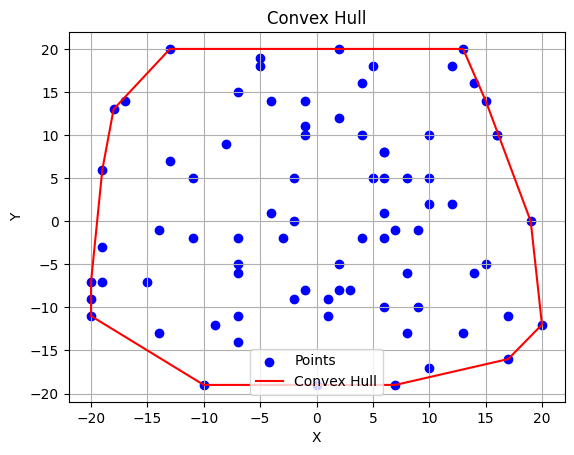

In [ ]:
def generate_random_points(num_points, min_val, max_val):
    # Generate random points within the given range
    points = []
    for _ in range(num_points):
        x = random.randint(min_val, max_val)
        y = random.randint(min_val, max_val)
        points.append((x, y))
    return points

# Get user input
num_points = int(input("Enter the number of points: "))
min_val = int(input("Enter the minimum value for coordinates: "))
max_val = int(input("Enter the maximum value for coordinates: "))

# Generate random points
points = generate_random_points(num_points, min_val, max_val)

# Compute the convex hull
result = incremental(points)
print("\n",result)

# Prepare the points for plotting
x_coords, y_coords = zip(*points)

# Plot the points and the convex hull
plt.scatter(x_coords, y_coords, color='blue', label='Points')
plt.plot(*zip(*result, result[0]), color='red', label='Convex Hull')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Convex Hull')
plt.legend()
plt.grid(True)
plt.show()


\\
- Gift Wrapping Algorithm



Enter the number of points: 80
Enter the minimum value for coordinates: -20
Enter the maximum value for coordinates: 50

 [(-20, -14), (15, -19), (44, -20), (49, 12), (48, 29), (45, 50), (5, 50), (-17, 38), (-19, 12)]


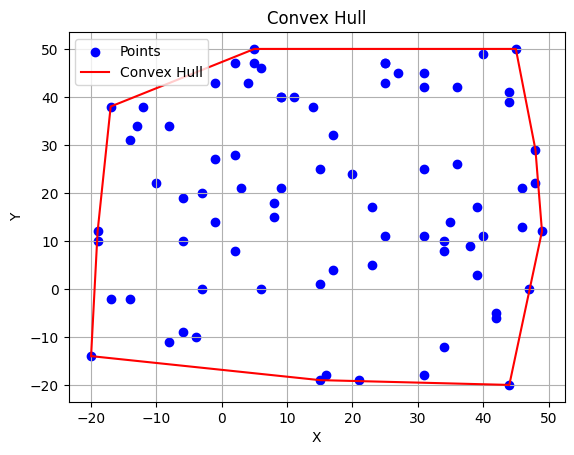

In [ ]:
# Get user input
num_points = int(input("Enter the number of points: "))
min_val = int(input("Enter the minimum value for coordinates: "))
max_val = int(input("Enter the maximum value for coordinates: "))


# Generate random points
points = generate_random_points(num_points, min_val, max_val)

# Compute the convex hull
result = gift_wrapping(points)
print("\n",result)

# Prepare the points for plotting
x_coords, y_coords = zip(*points)

# Plot the points and the convex hull
plt.scatter(x_coords, y_coords, color='blue', label='Points')
plt.plot(*zip(*result, result[0]), color='red', label='Convex Hull')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Convex Hull')
plt.legend()
plt.grid(True)
plt.show()


\\
- Divide and Conquer Algorithm


Enter the number of points: 80
Enter the minimum coordinate value: -15
Enter the maximum coordinate value: 30

 [(-20, -14), (15, -19), (44, -20), (49, 12), (48, 29), (45, 50), (5, 50), (-17, 38), (-19, 12)]


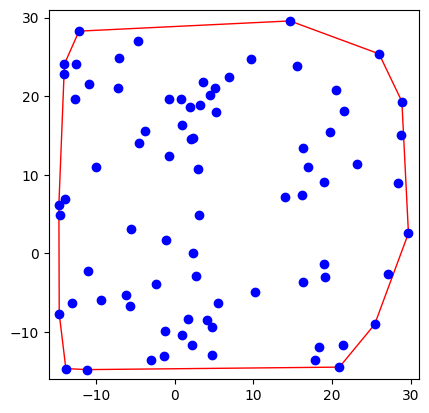

In [ ]:
# Get input from the user
num_points = int(input("Enter the number of points: "))
min_coord = int(input("Enter the minimum coordinate value: "))
max_coord = int(input("Enter the maximum coordinate value: "))

# Generate random points
points = [(random.uniform(min_coord, max_coord), random.uniform(min_coord, max_coord)) for _ in range(num_points)]

# Compute the convex hull
convex_hull_points = divide_and_conquer(points)
print("\n",result)


# Plotting the points and the convex hull
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.set_xlim(min_coord - 1, max_coord + 1)
ax.set_ylim(min_coord - 1, max_coord + 1)

# Plot points
for point in points:
    ax.plot(point[0], point[1], "bo")

# Plot convex hull
convex_hull_patch = Polygon(convex_hull_points, closed=True, fill=None, edgecolor="r")
ax.add_patch(convex_hull_patch)

plt.show()


\\
- QuickHull Algorithm.

Enter the number of points: 80
Enter the minimum value for coordinates: -22
Enter the maximum value for coordinates: 35

 [(35, 12), (34, 25), (15, 29), (-13, 34), (-20, 28), (-22, -2), (-19, -20), (19, -20), (34, -19), (35, 3)]


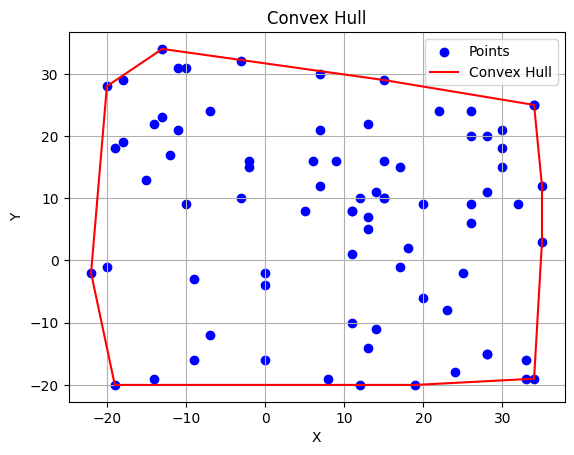

In [ ]:
# Get user input
num_points = int(input("Enter the number of points: "))
min_val = int(input("Enter the minimum value for coordinates: "))
max_val = int(input("Enter the maximum value for coordinates: "))


# Generate random points
points = generate_random_points(num_points, min_val, max_val)

# Prepare the points for plotting
x_coords, y_coords = zip(*points)
plt.scatter(x_coords, y_coords, color='blue', label='Points')

# Compute the convex hull
result = quickhull(points)
print("\n",result)

# Plot the points and the convex hull
#plt.scatter(x_coords, y_coords, color='blue', label='Points')
plt.plot(*zip(*result, result[0]), color='red', label='Convex Hull')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Convex Hull')
plt.legend()
plt.grid(True)
plt.show()



\\
- Visualization of the steps of the QuickHull algorithm.



Enter the number of points: 50
Enter the minimum value for coordinates: -20
Enter the maximum value for coordinates: 35


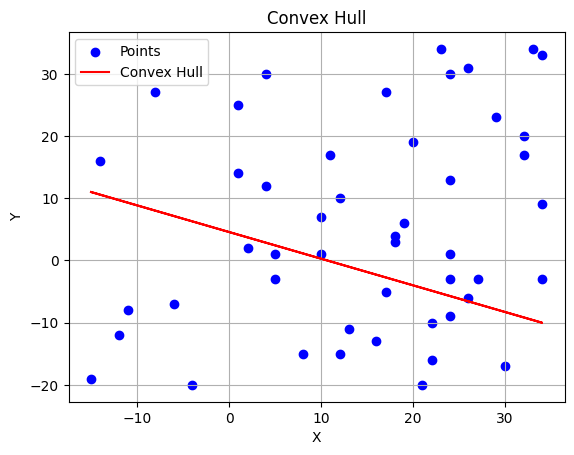

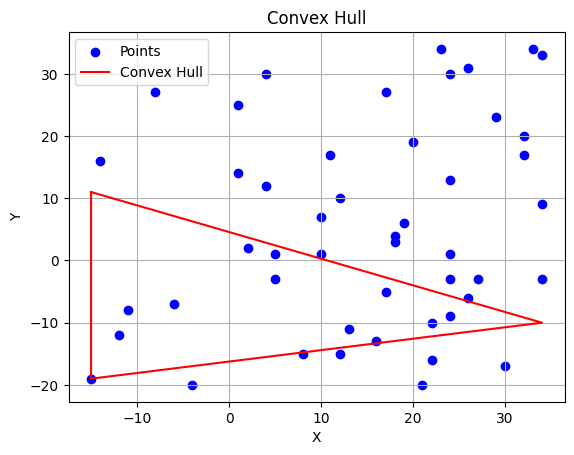

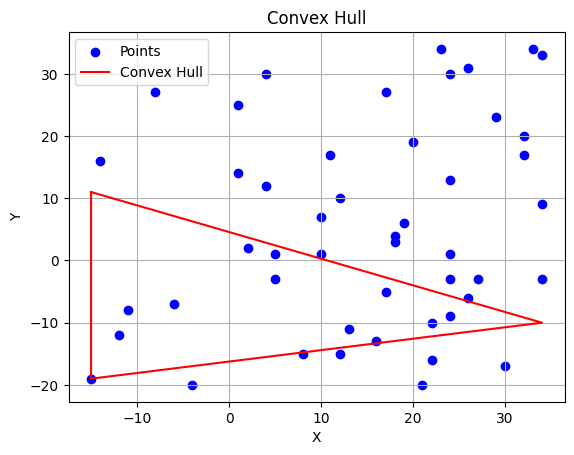

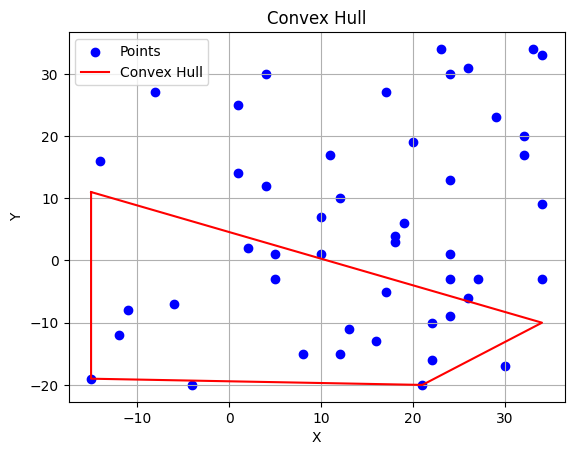

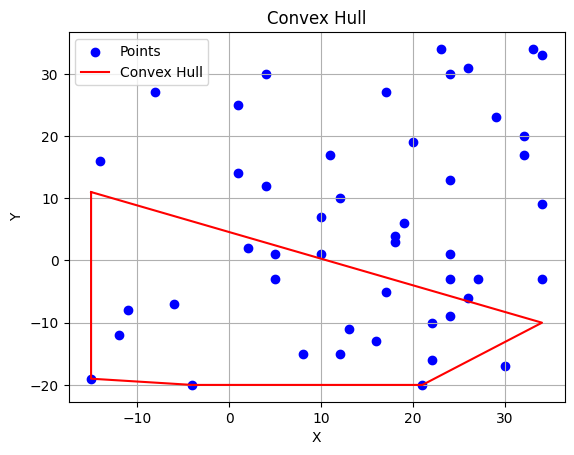

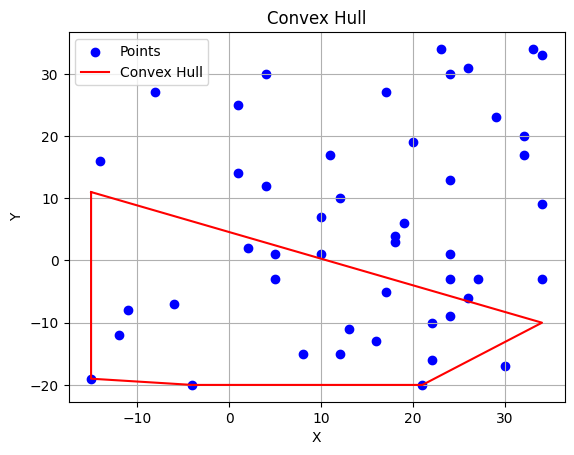

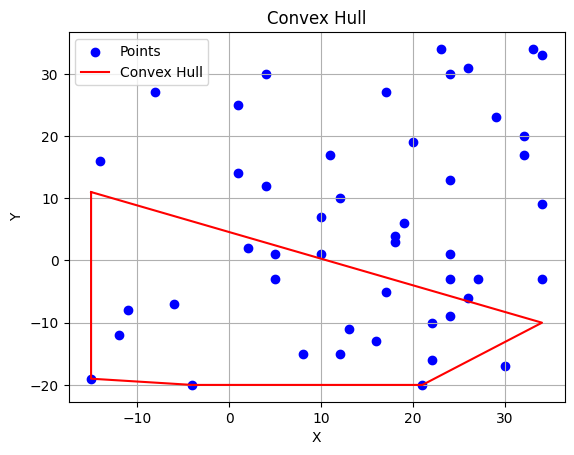

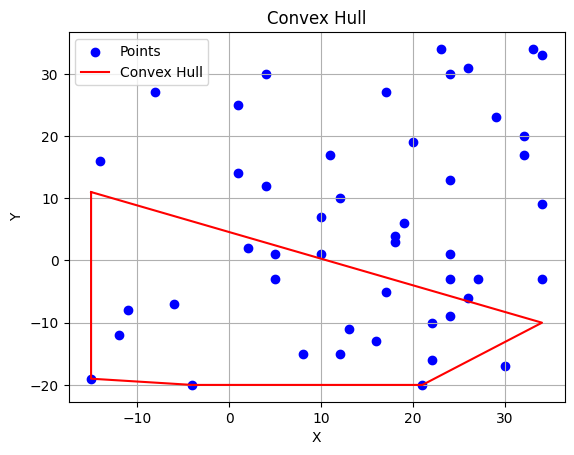

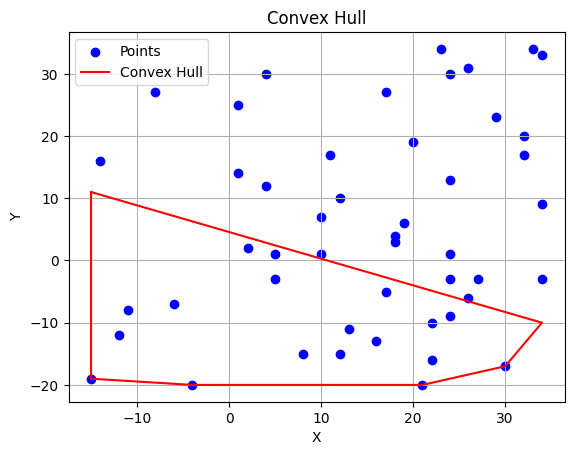

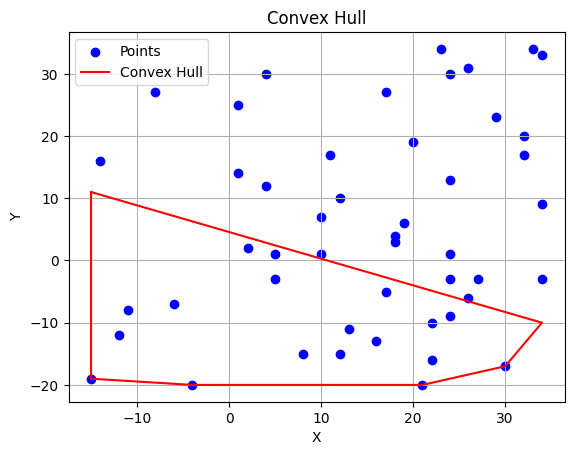

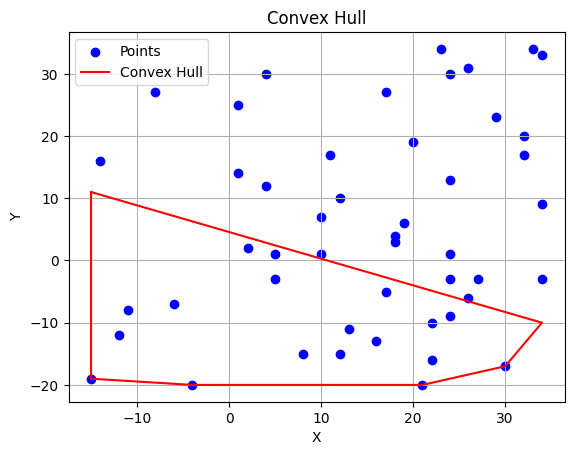

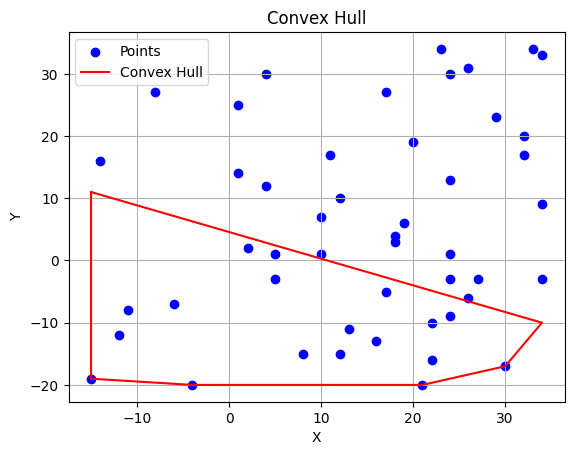

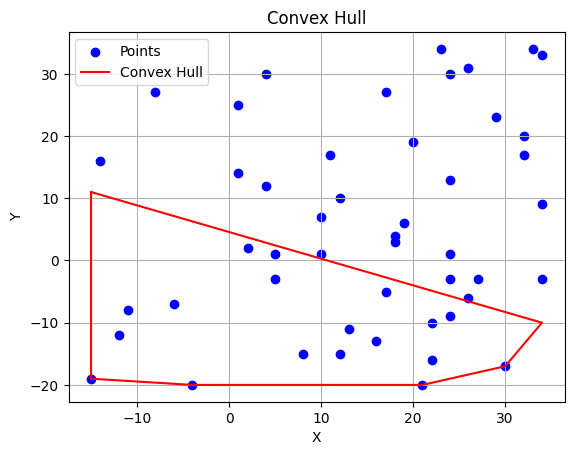

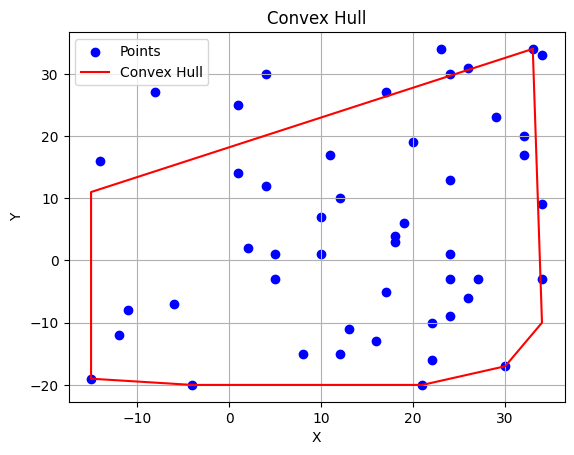

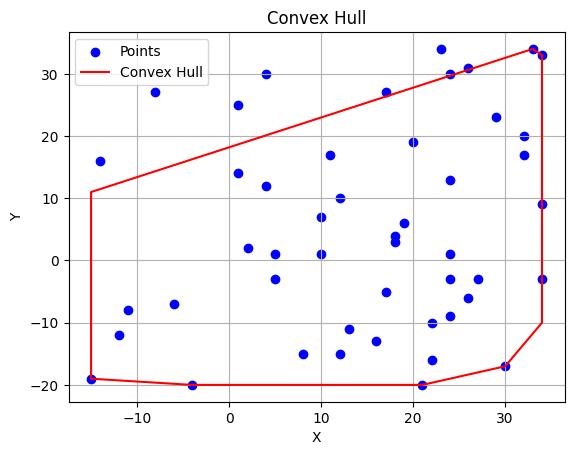

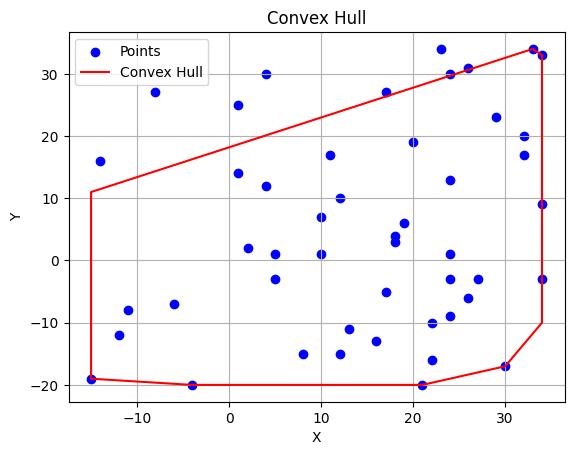

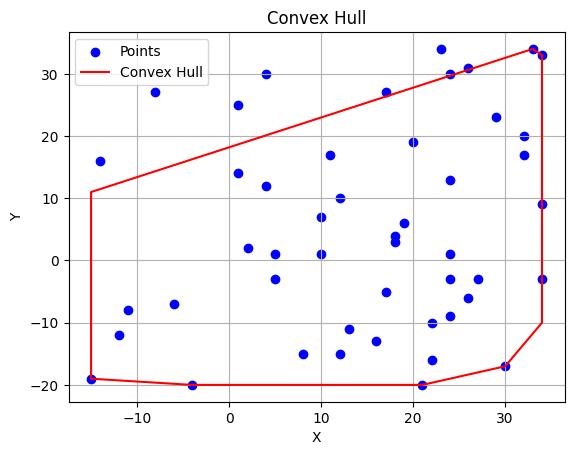

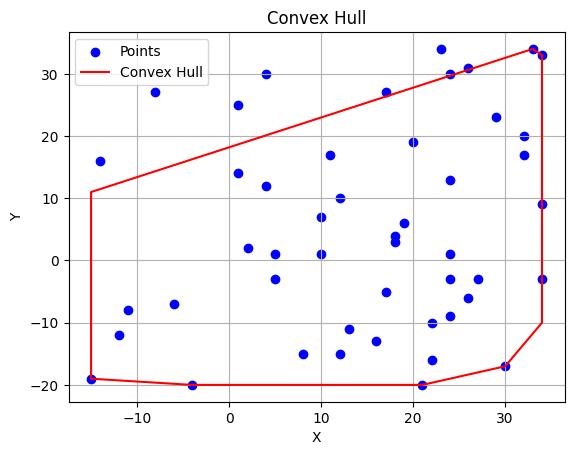

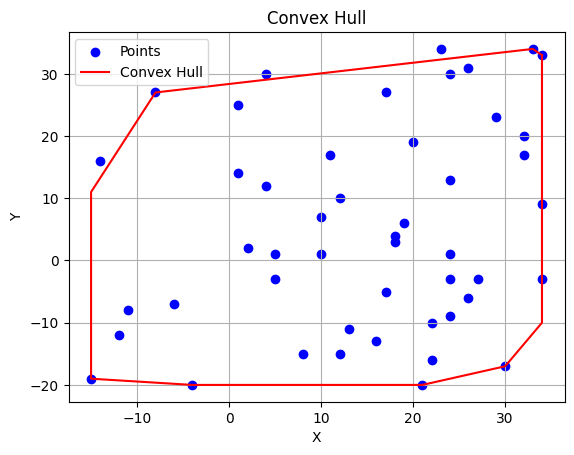

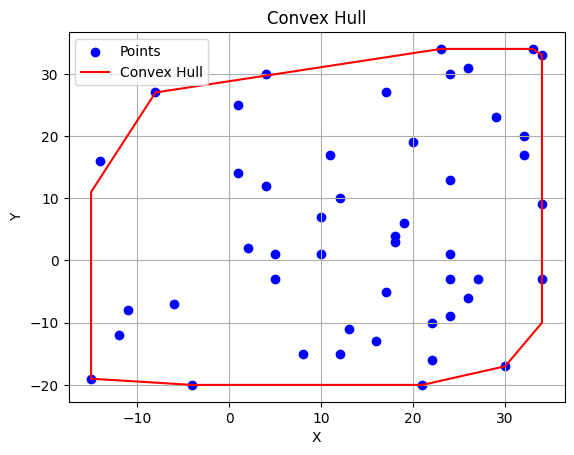

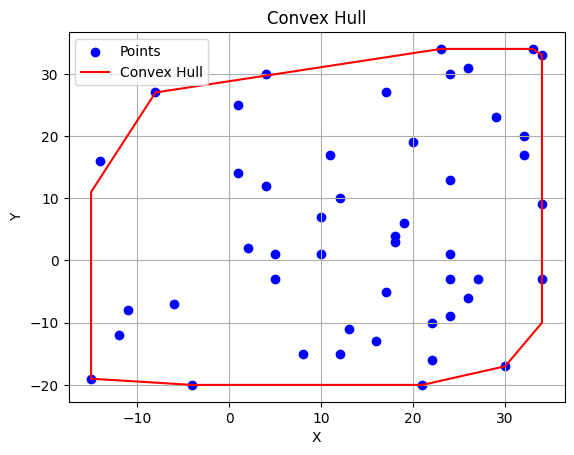

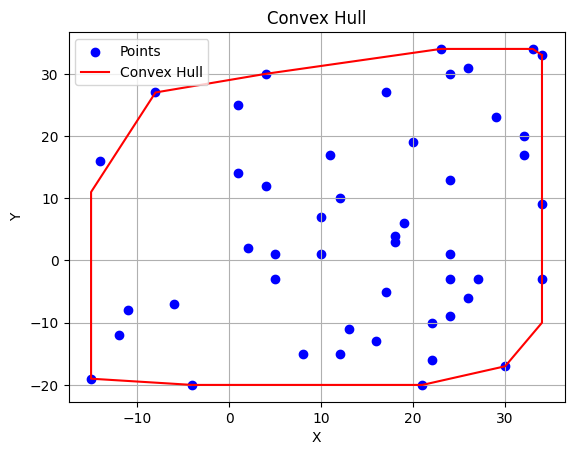

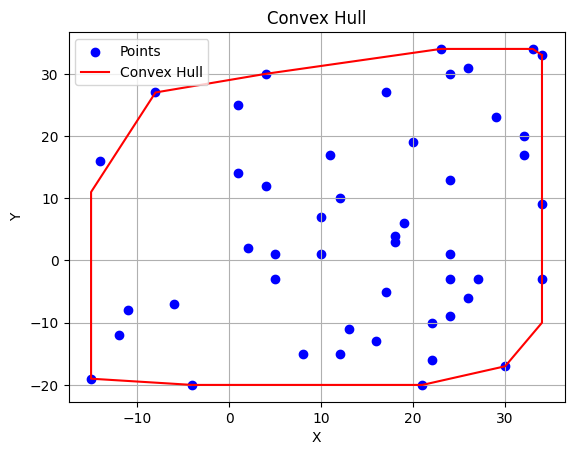

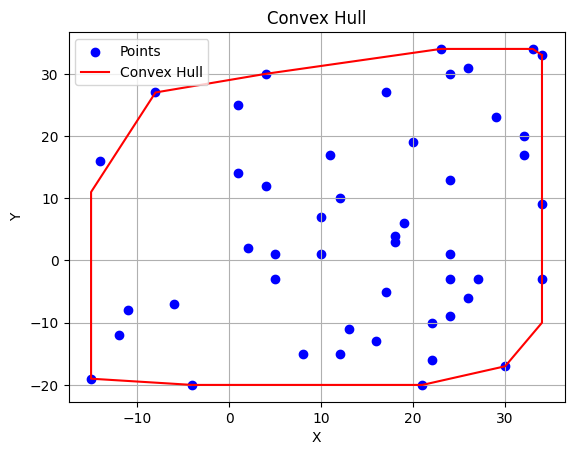

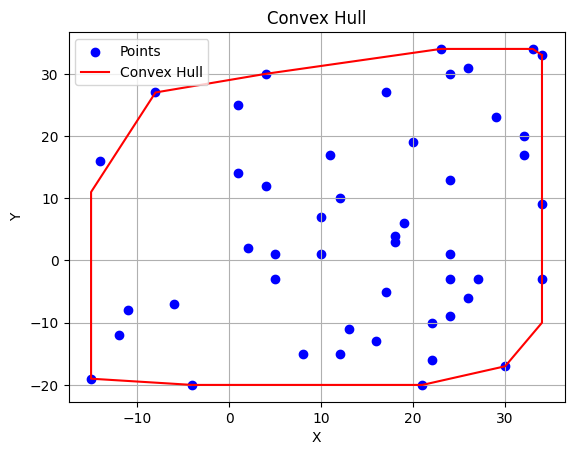

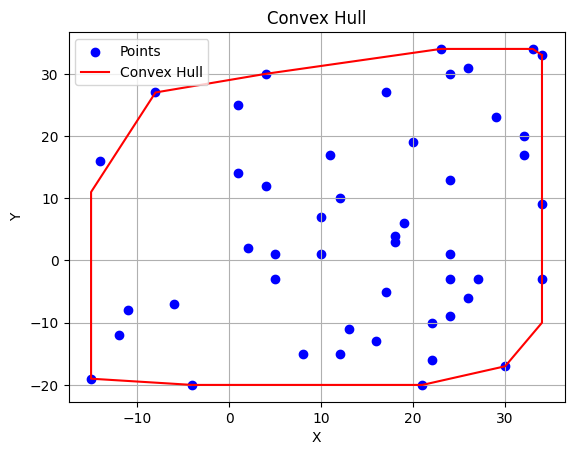

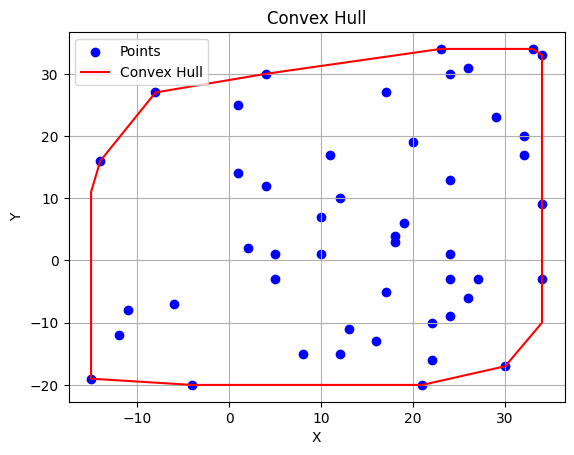

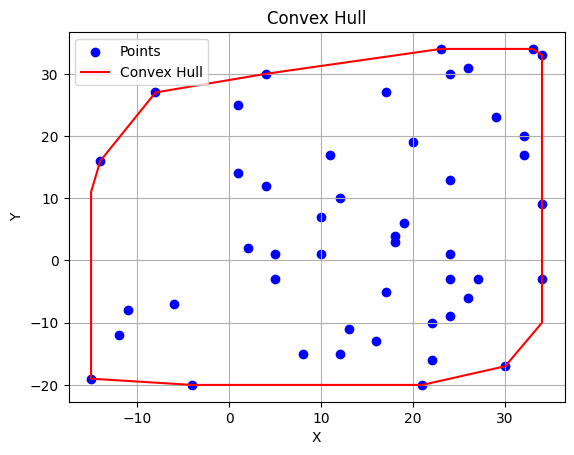

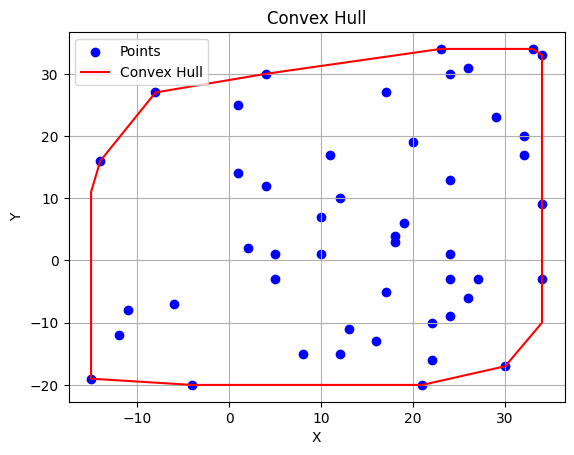

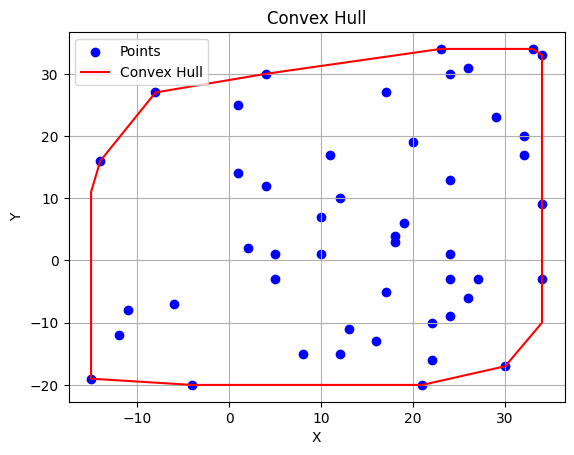

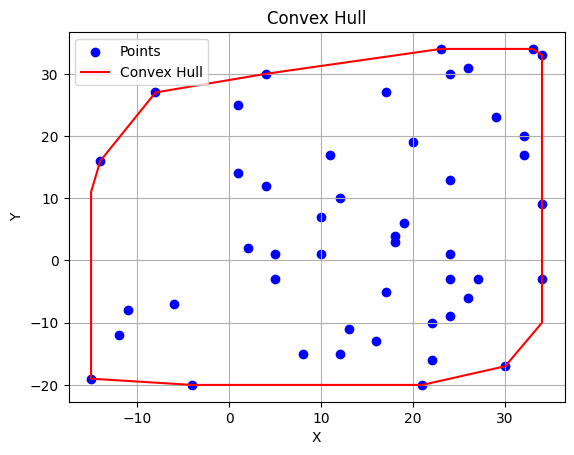

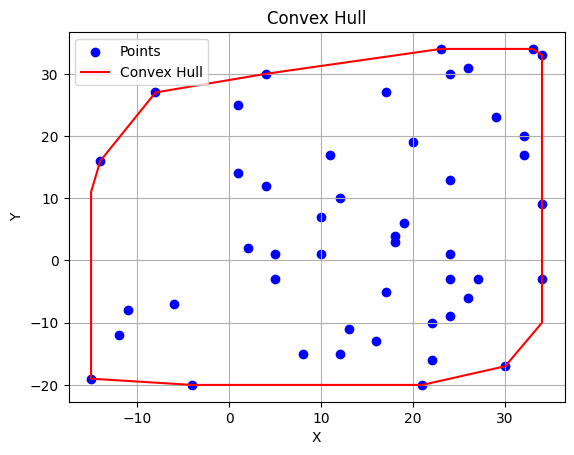

In [ ]:
import matplotlib.pyplot as plt
import random

def orientation(p, q, r):
    """
    Function to find the orientation of triplet (p, q, r)
    Returns the following values:
    0: Collinear points
    1: Clockwise orientation
    2: Counterclockwise orientation
    """
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])

    if val == 0:
        return 0  # Collinear
    elif val > 0:
        return 1  # Clockwise
    else:
        return 2  # Counterclockwise


def find_distance(p, q, r):
    """
    Function to find the distance between point r and line formed by points p and q
    """
    return abs((q[1] - p[1]) * r[0] - (q[0] - p[0]) * r[1] + q[0] * p[1] - q[1] * p[0])


def quickhull1(points):
    if len(points) < 3:
        return points

    min_x = max_x = points[0]

    # Find the point with minimum and maximum x-coordinate
    for point in points:
        if point[0] < min_x[0]:
            min_x = point
        if point[0] > max_x[0]:
            max_x = point

    hull = []
    hull.append(min_x)
    hull.append(max_x)

    points.remove(min_x)
    points.remove(max_x)

    left_set = []
    right_set = []

    for point in points:
        if orientation(min_x, max_x, point) == 1:
            left_set.append(point)
        elif orientation(min_x, max_x, point) == 2:
            right_set.append(point)

    plot_hull(points, hull)  # Plot initial hull

    find_hull(min_x, max_x, left_set, hull, points)
    find_hull(max_x, min_x, right_set, hull, points)

    return hull


def find_hull(p, q, point_set, hull, all_points):
    if len(point_set) == 0:
        return

    max_dist = 0
    max_point = ()
    for point in point_set:
        dist = find_distance(p, q, point)
        if dist > max_dist:
            max_dist = dist
            max_point = point

    if max_point:
        hull.insert(hull.index(q), max_point)

        next_left_set = []
        next_right_set = []

        for point in point_set:
            if orientation(p, max_point, point) == 1:
                next_left_set.append(point)
            elif orientation(max_point, q, point) == 1:
                next_right_set.append(point)

        plot_hull(all_points, hull)  # Plot intermediate hull after recursion on left_set
        find_hull(p, max_point, next_left_set, hull, all_points)
        plot_hull(all_points, hull)  # Plot intermediate hull after recursion on right_set
        find_hull(max_point, q, next_right_set, hull, all_points)
        plot_hull(all_points, hull)  # Plot intermediate hull after recursion on right_set


def generate_random_points(num_points, min_val, max_val):
    # Generate random points withinthe given range
    points = []
    for _ in range(num_points):
        x = random.randint(min_val, max_val)
        y = random.randint(min_val, max_val)
        points.append((x, y))
    return points


def plot_hull(points, hull):
    # Prepare the points for plotting
    x_coords, y_coords = zip(*points)
    plt.clf()  # Clear the previous plot
    plt.scatter(x_coords, y_coords, color='blue', label='Points')
    plt.plot(*zip(*hull, hull[0]), color='red', label='Convex Hull')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Convex Hull')
    plt.legend()
    plt.grid(True)
    plt.pause(0.5)  # Pause for a short duration to show the plot


# Get user input
num_points = int(input("Enter the number of points: "))
min_val = int(input("Enter the minimum value for coordinates: "))
max_val = int(input("Enter the maximum value for coordinates: "))

# Generate random points
points = generate_random_points(num_points, min_val, max_val)


# Prepare the points for plotting
x_coords, y_coords = zip(*points)
plt.scatter(x_coords, y_coords, color='blue', label='Points')

# Compute the convex hull
result = quickhull1(points)

# Plot the final convex hull
plot_hull(points, result)

plt.show()


###2. Considering various sets of points in the plane, compare the above algorithms based on their implementation time and the quality of the results obtained.


In [ ]:
import time



# Get user input
num_points = int(input("Enter the number of points: "))
min_val = int(input("Enter the minimum value for coordinates: "))
max_val = int(input("Enter the maximum value for coordinates: "))
points = generate_random_points(num_points, min_val, max_val)


start_time = time.time()
result = incremental(points)
end_time = time.time()
running_time1 = end_time - start_time

start_time = time.time()
result = gift_wrapping(points)
end_time = time.time()
running_time2 = end_time - start_time


start_time = time.time()
convex_hull_points = divide_and_conquer(points)
end_time = time.time()
running_time3 = end_time - start_time


start_time = time.time()
result = quickhull(points)
end_time = time.time()
running_time4 = end_time - start_time


print("Running time for 'incremental' algorithm is ",running_time1)
print("Running time for 'gift_wrapping' algorithm is ",running_time2)
print("Running time for 'divide and conquer' algorithm is ",running_time3)
print("Running time for 'quickhull' algorithm is ",running_time4)


Enter the number of points: 10000
Enter the minimum value for coordinates: -1000
Enter the maximum value for coordinates: 1000
Running time for 'incremental' algorithm is  0.022034406661987305
Running time for 'gift_wrapping' algorithm is  0.09445023536682129
Running time for 'divide and conquer' algorithm is  0.024451017379760742
Running time for 'quickhull' algorithm is  0.016260623931884766



**Incremental Algorithm:**
  The incremental algorithm starts with an empty convex hull and gradually adds points to it. It maintains a convex hull by adding points one by one, ensuring the convexity property is preserved at each step. The time complexity of this algorithm is generally O(n log n), where n is the number of input points. The quality of the results is usually good, but it may not be optimal for complex point distributions.

  \\

**Gift-Wrapping Algorithm:**
  The gift-wrapping algorithm sorts points based on their polar angles and constructs the convex hull counterclockwise. It starts by finding the point with the lowest y-coordinate (and the leftmost point in case of a tie) as the starting point. Then, it sorts the remaining points based on their angles with respect to the starting point and constructs the convex hull by iteratively adding and removing points for concave turns. The time complexity of this algorithm is generally O(n^2) due to the sorting step. The quality of the results is generally good and optimal for most point distributions.

\\

**Divide and Conquer Algorithm:**
  The divide and conquer algorithm for finding the convex hull recursively divides the points into smaller subsets, solves the subproblems separately, and then merges the convex hulls of the subproblems to obtain the final convex hull. The time complexity of this algorithm is O(n log n), similar to the convex hull algorithm, but it may have a slightly higher constant factor due to its recursive nature. The quality of the results is generally good and optimal for most point distributions.

\\

**QuickHull Algorithm:**
  The QuickHull algorithm is a specially designed divide and conquer algorithm for finding the convex hull. It starts by finding the leftmost and rightmost points and constructs the initial hull using these points. Then, it recursively divides the points into two subsets based on their position relative to the line formed by the leftmost and rightmost points. The algorithm then constructs the convex hull on each side of the line. The time complexity of the QuickHull algorithm is usually O(n log n), but in the worst case, it can be O(n^2). The quality of the results is generally good and performs well for many point distributions, but it may not be optimal for all cases.

\\

In summary, the choice of the algorithm depends on the specific requirements of the problem. If implementation efficiency is critical, the incremental algorithm may be a suitable choice. If the quality and optimization of results are of utmost importance, algorithms like gift wrapping or divide and conquer might be preferable. The QuickHull algorithm offers a balance between efficiency and quality, but its worst-case time complexity should be considered.



###3. Consider 50 points in the 3D space $\mathrm{R}^{3}$ and apply the algorithm you have implemented to construct their convex hull.


\\

###**Answer**

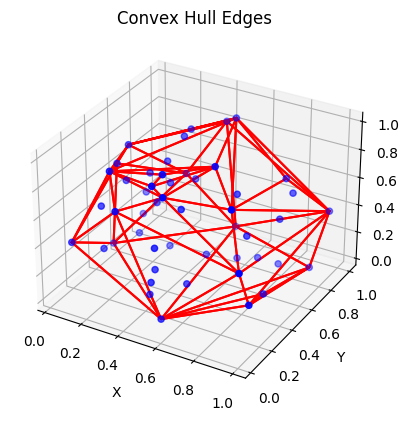

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull


def generate_random_points(n):
    # Generate n random points in 3D space
    return np.random.rand(n, 3)


def plot_convex_hull(points, hull):
    # Plot the points and the convex hull edges
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot points
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b', marker='o')

    # Plot convex hull edges
    for simplex in hull.simplices:
        simplex = np.append(simplex, simplex[0])  # Connect the last point to the first to close the loop
        ax.plot(points[simplex, 0], points[simplex, 1], points[simplex, 2], 'r-')

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Convex Hull Edges')

    # Show the plot
    plt.show()


def main():
    # Generate random points
    points = generate_random_points(50)

    # Compute convex hull
    hull = ConvexHull(points)

    # Plot the convex hull edges
    plot_convex_hull(points, hull)


if __name__ == "__main__":
    main()


##**Implementation 2:** Geometric Search

###1. Implement the following algorithms for finding the convex hull in the plane:

\\
- Implement an algorithm for orthogonal geometric search for the set of points P.

\\
- Analyze the complexity of the above algorithm.



In [ ]:
import math
import matplotlib.pyplot as plt

class Node:
    def __init__(self, point, left=None, right=None):
        self.point = point
        self.left = left
        self.right = right

def build_kdtree(points, depth=0):
    if not points:
        return None

    axis = depth % 2
    sorted_points = sorted(points, key=lambda point: point[axis])
    median = len(sorted_points) // 2

    return Node(
        point=sorted_points[median],
        left=build_kdtree(sorted_points[:median], depth + 1),
        right=build_kdtree(sorted_points[median + 1:], depth + 1)
    )

def is_point_inside_rect(point, rect):
    x, y = point
    x1, y1, x2, y2 = rect
    return x1 <= x <= x2 and y1 <= y <= y2

def points_inside_rect(node, rect, depth=0, result=None):
    if node is None:
        return

    axis = depth % 2
    x, y = node.point
    x1, y1, x2, y2 = rect

    if is_point_inside_rect(node.point, rect):
        result.append(node.point)

    if axis == 0:
        if x >= x1:
            points_inside_rect(node.left, rect, depth + 1, result)
        if x <= x2:
            points_inside_rect(node.right, rect, depth + 1, result)
    else:
        if y >= y1:
            points_inside_rect(node.left, rect, depth + 1, result)
        if y <= y2:
            points_inside_rect(node.right, rect, depth + 1, result)

def plot_kdtree(node, xmin, xmax, ymin, ymax, depth=0):
    if node is None:
        return

    axis = depth % 2

    # Plot the current splitting line
    if axis == 0:
        plt.plot([node.point[0], node.point[0]], [ymin, ymax], 'r--', linewidth=0.7)
        plot_kdtree(node.left, xmin, node.point[0], ymin, ymax, depth + 1)
        plot_kdtree(node.right, node.point[0], xmax, ymin, ymax, depth + 1)
    else:
        plt.plot([xmin, xmax], [node.point[1], node.point[1]], 'r--', linewidth=0.7)
        plot_kdtree(node.left, xmin, xmax, ymin, node.point[1], depth + 1)
        plot_kdtree(node.right, xmin, xmax, node.point[1], ymax, depth + 1)

    # Plot the current point
    plt.plot(node.point[0], node.point[1], 'bo', markersize=3)

**The complexity of geometric search using a kd-tree in 2D can be analyzed as follows:**

 **Construction Complexity:** \\

The construction of a kd-tree involves the recursive partitioning of points in a balanced manner based on their coordinates. The process begins by selecting a splitting axis (x or y) and a splitting value that divides the points into two subsets. This splitting step is performed recursively until each subset contains only a small number of points. \\

In the worst case, the construction complexity of a kd-tree is O(n log n), where n is the number of input points. This complexity arises when the points are uniformly distributed, leading to a balanced tree. However, in practice, the construction complexity is often close to O(n), especially when points are not uniformly distributed.

\\
**Query Complexity:** \\

The query complexity refers to the time required to execute a search operation in a kd-tree. The goal is to efficiently locate points satisfying certain search criteria, such as finding the nearest neighbor or points within a specific range. \\

In the best case, when the query point is directly on a splitting level, the query complexity is O(log n). However, in the worst case, the query complexity can be O(n) if the entire tree needs to be traversed. This situation occurs when the query point is far from the splitting levels or when the range of interest includes a large number of points. \\

On average, the query complexity of a balanced kd-tree is O(sqrt(n) + k), where k is the number of referenced points satisfying the search criteria. This complexity arises from the fact that the search operation usually follows a path through the tree, visiting a limited number of nodes.

Additionally, the performance of a kd-tree can be influenced by the distribution of points and the dimension of the space. In higher-dimensional spaces, the efficiency of kd-trees tends to decrease due to the "curse of dimensionality." Other spatial indexing structures, such as R-trees or quad trees, may be more suitable in such cases.

##**Application 2:**

###1. Consider a set P of 60 points in the plane and a rectangular area. Apply the algorithm of your choice to record which points from P are within the rectangular area.

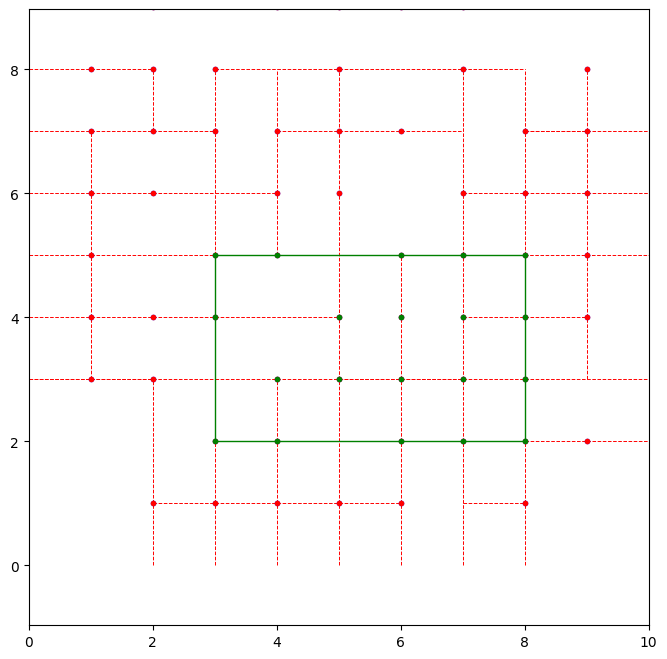

In [ ]:

# Example usage
points = [(2, 3), (5, 4), (9, 6), (4, 7), (8, 1), (7, 2), (6, 3), (1, 5), (3, 2), (4, 5),
          (6, 7), (2, 8), (5, 1), (9, 4), (7, 6), (3, 7), (8, 2), (7, 5), (1, 3), (4, 6),
          (6, 1), (8, 3), (5, 7), (2, 4), (9, 2), (3, 1), (7, 3), (6, 9), (1, 8), (4, 2),
          (5, 9), (2, 6), (8, 7), (3, 4), (9, 8), (1, 7), (6, 2), (5, 6), (2, 9), (4, 1),
          (8, 4), (7, 8), (3, 5), (1, 6), (9, 7), (6, 5), (2, 1), (4, 9), (8, 6), (7, 4),
          (5, 3), (3, 8), (9, 5), (6, 4), (2, 7), (1, 4), (4, 3), (5, 8), (8, 5), (7, 9)]


# Build the kd-tree
tree = build_kdtree(points)

# Define the rectangular area (bottom-left corner, top-right corner)
rect = (3, 2, 8, 5)

# Set up the plot
plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.xlim(0, 10)
plt.ylim(0, 8)

# Plot the kd-tree
plot_kdtree(tree, 0, 10, 0, 8)

# Add the points
for point in points:
    plt.plot(point[0], point[1], 'ro', markersize=3)

# Plot the rectangular area
x1, y1, x2, y2 = rect
plt.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], 'g-', linewidth=1)

# Find the points inside the rectangular area
result = []
points_inside_rect(tree, rect, 0, result)

# Add the points inside the rectangular area
for point in result:
    plt.plot(point[0], point[1], 'go', markersize=3)

# Show the plot
plt.show()

##**Application 3:** Delaunay Triangulation - Voronoi Diagram.

###1. Illustrate the correspondence between Delaunay triangulation and the Voronoi diagram for P.

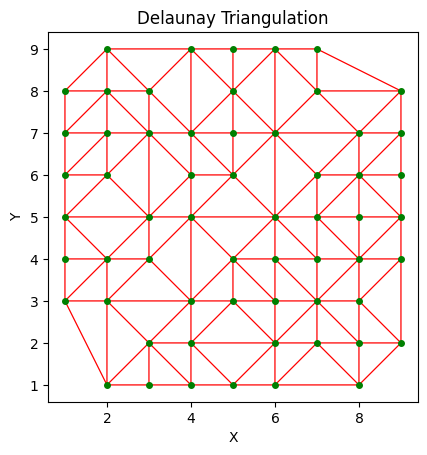

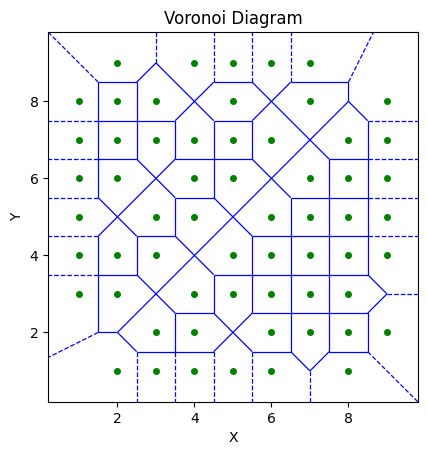

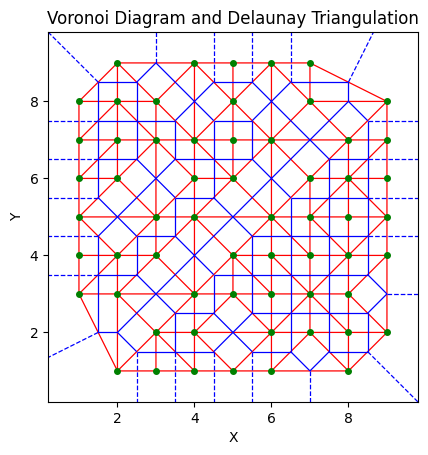

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay, Voronoi, voronoi_plot_2d

# Sample points in the plane
#points = np.array([[0, 0], [1, 3], [2, 1], [3, 4], [4, 2]])
points =  np.array([(2, 3), (5, 4), (9, 6), (4, 7), (8, 1), (7, 2), (6, 3), (1, 5), (3, 2), (4, 5),
          (6, 7), (2, 8), (5, 1), (9, 4), (7, 6), (3, 7), (8, 2), (7, 5), (1, 3), (4, 6),
          (6, 1), (8, 3), (5, 7), (2, 4), (9, 2), (3, 1), (7, 3), (6, 9), (1, 8), (4, 2),
          (5, 9), (2, 6), (8, 7), (3, 4), (9, 8), (1, 7), (6, 2), (5, 6), (2, 9), (4, 1),
          (8, 4), (7, 8), (3, 5), (1, 6), (9, 7), (6, 5), (2, 1), (4, 9), (8, 6), (7, 4),
          (5, 3), (3, 8), (9, 5), (6, 4), (2, 7), (1, 4), (4, 3), (5, 8), (8, 5), (7, 9)])
# Compute Delaunay triangulation
tri = Delaunay(points)

# Compute Voronoi diagram
vor = Voronoi(points)

# Plot Delaunay triangulation
plt.triplot(points[:, 0], points[:, 1], tri.simplices, color='red', linewidth=0.9)
plt.plot(points[:, 0], points[:, 1], 'o', color='green', markersize=4)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Delaunay Triangulation')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Plot Voronoi diagram
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=False, line_colors='blue', line_width= 0.9)
ax.plot(points[:, 0], points[:, 1], 'o', color='green', markersize=4)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Voronoi Diagram')
ax.set_aspect('equal', adjustable='box')
plt.show()


# Plot Delaunay triangulation and Voronoi diagram together
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=False, line_colors='blue', line_width= 0.9)
ax.plot(points[:, 0], points[:, 1], 'o', color='green', markersize=4)
plt.triplot(points[:, 0], points[:, 1], tri.simplices, color='red', linewidth=0.9)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Voronoi Diagram and Delaunay Triangulation')
ax.set_aspect('equal', adjustable='box')
plt.show()

### 2. Comment on the complexity of the algorithms. How does the number n of points affect the complexity?

The complexity of the Voronoi Diagram and Delaunay Triangulation algorithms can be analyzed as follows, considering the number of points n:

\\

  **Voronoi Diagram:**

  The Voronoi diagram is a geometric structure that divides a plane into regions based on proximity to a set of points. The construction complexity of the Voronoi Diagram is generally O(n log n) in two dimensions.

The algorithm typically involves a series of steps, such as constructing the Delaunay triangulation (which has its own complexity) and then extracting the Voronoi diagram from it. The time complexity is dominated by the Delaunay Triangulation step.

The complexity of the query of the Voronoi Diagram, referring to determining the region to which a specific point belongs, is generally O(log n) for a well-implemented data structure. This complexity arises from the search operation in the diagram's structure.

Regarding the impact of the number of points n, both construction and query complexity depend on it. The construction complexity of O(n log n) scales logarithmically with the number of points, meaning that as n increases, the time required for diagram construction increases at a logarithmic rate. The query complexity of O(log n) remains relatively constant regardless of the number of points, making the Voronoi Diagram an efficient structure for spatial queries.
  

\\

  **Delaunay Triangulation:**

  Delaunay triangulation is a triangulation of a set of points such that no point is inside the circumcircle of any triangle. Like the Voronoi diagram, the construction complexity of Delaunay triangulation is generally O(n log n) in two dimensions.

The algorithm includes steps such as finding the convex hull of points and then gradually adding triangles based on the Delaunay criterion. The time complexity is dominated by sorting and searching steps during the construction process.

The query complexity (finding the triangle to which a specific point belongs) of Delaunay triangulation is generally O(log n) when using a well-implemented data structure.